https://plot.ly/python/animations/#moving-frenet-frame-along-a-planar-curve

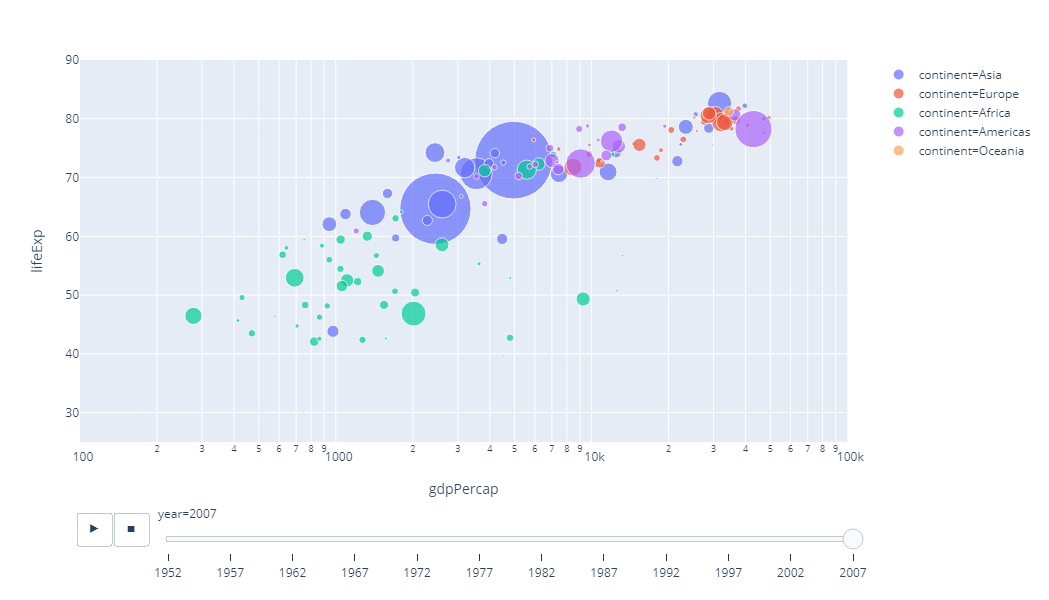

In [1]:
import plotly.express as px
gapminder = px.data.gapminder()
px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# Simple Play Button

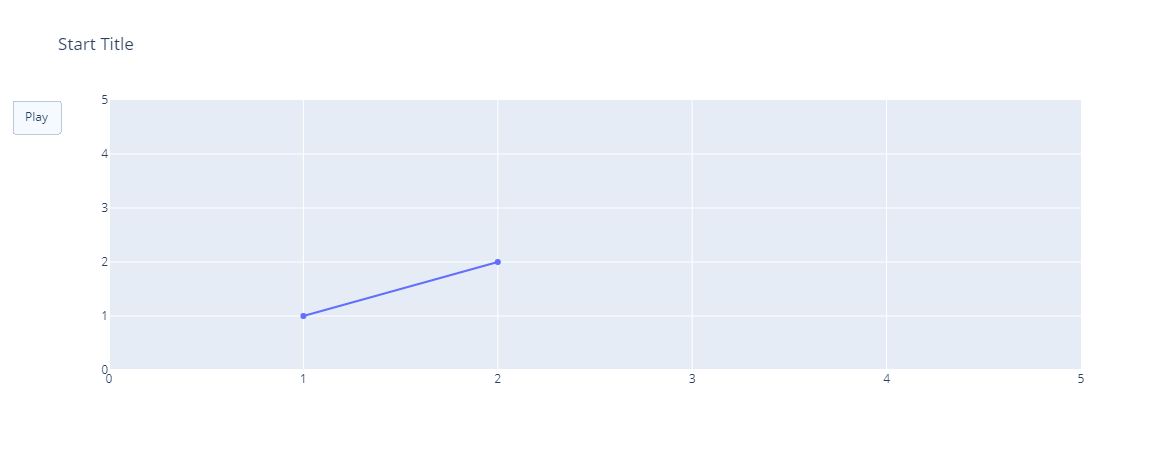

In [4]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()

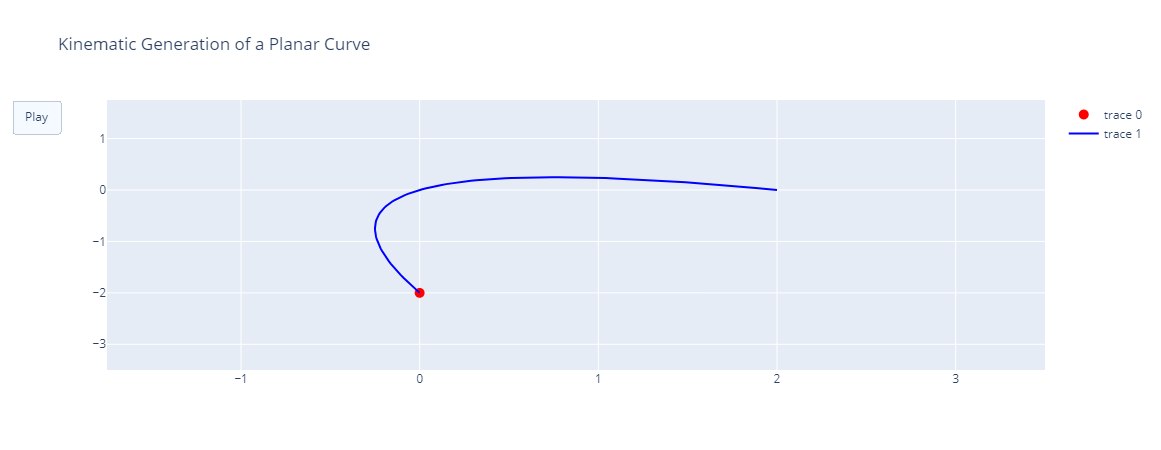

In [5]:
# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     mode="lines",
                     line=dict(width=2, color="blue"))],
    layout=go.Layout(
        xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
        yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
        title_text="Kinematic Generation of a Planar Curve", hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(N)]
)

fig.show()

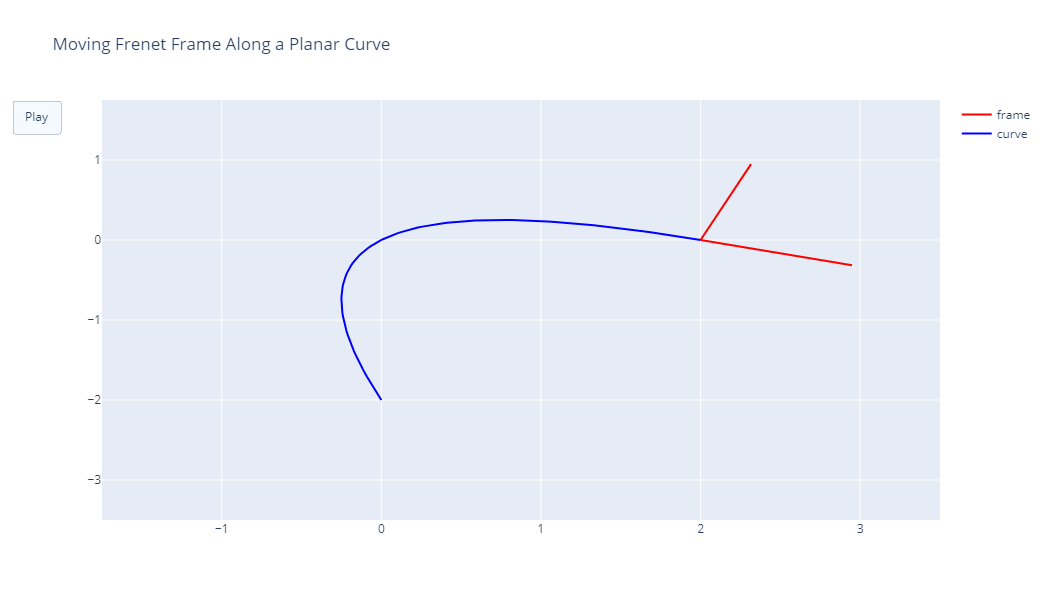

In [2]:
import plotly.graph_objects as go

import numpy as np


# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2
vx = 1 + 2 * s
vy = 1 - 2 * s  # v=(vx, vy) is the velocity
speed = np.sqrt(vx ** 2 + vy ** 2)
ux = vx / speed  # (ux, uy) unit tangent vector, (-uy, ux) unit normal vector
uy = vy / speed

xend = xx + ux  # end coordinates for the unit tangent vector at (xx, yy)
yend = yy + uy

xnoe = xx - uy  # end coordinates for the unit normal vector at (xx,yy)
ynoe = yy + ux


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     name="frame",
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     name="curve",
                     mode="lines",
                     line=dict(width=2, color="blue"))
          ],
    layout=go.Layout(width=600, height=600,
                     xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                     yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
                     title="Moving Frenet Frame Along a Planar Curve",
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="Play",
                                                     method="animate",
                                                     args=[None])])]),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], xend[k], None, xx[k], xnoe[k]],
            y=[yy[k], yend[k], None, yy[k], ynoe[k]],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(N)]
)

fig.show()

In [2]:
# import plotly.graph_objects as go

# import pandas as pd

# url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
# dataset = pd.read_csv(url)

# years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
#          "2007"]

# # make list of continents
# continents = []
# for continent in dataset["continent"]:
#     if continent not in continents:
#         continents.append(continent)
# # make figure
# fig_dict = {
#     "data": [],
#     "layout": {},
#     "frames": []
# }

# # fill in most of layout
# fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
# fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
# fig_dict["layout"]["hovermode"] = "closest"
# fig_dict["layout"]["sliders"] = {
#     "args": [
#         "transition", {
#             "duration": 400,
#             "easing": "cubic-in-out"
#         }
#     ],
#     "initialValue": "1952",
#     "plotlycommand": "animate",
#     "values": years,
#     "visible": True
# }
# fig_dict["layout"]["updatemenus"] = [
#     {
#         "buttons": [
#             {
#                 "args": [None, {"frame": {"duration": 500, "redraw": False},
#                                 "fromcurrent": True, "transition": {"duration": 300,
#                                                                     "easing": "quadratic-in-out"}}],
#                 "label": "Play",
#                 "method": "animate"
#             },
#             {
#                 "args": [[None], {"frame": {"duration": 0, "redraw": False},
#                                   "mode": "immediate",
#                                   "transition": {"duration": 0}}],
#                 "label": "Pause",
#                 "method": "animate"
#             }
#         ],
#         "direction": "left",
#         "pad": {"r": 10, "t": 87},
#         "showactive": False,
#         "type": "buttons",
#         "x": 0.1,
#         "xanchor": "right",
#         "y": 0,
#         "yanchor": "top"
#     }
# ]

# sliders_dict = {
#     "active": 0,
#     "yanchor": "top",
#     "xanchor": "left",
#     "currentvalue": {
#         "font": {"size": 20},
#         "prefix": "Year:",
#         "visible": True,
#         "xanchor": "right"
#     },
#     "transition": {"duration": 300, "easing": "cubic-in-out"},
#     "pad": {"b": 10, "t": 50},
#     "len": 0.9,
#     "x": 0.1,
#     "y": 0,
#     "steps": []
# }

# # make data
# year = 1952
# for continent in continents:
#     dataset_by_year = dataset[dataset["year"] == year]
#     dataset_by_year_and_cont = dataset_by_year[
#         dataset_by_year["continent"] == continent]

#     data_dict = {
#         "x": list(dataset_by_year_and_cont["lifeExp"]),
#         "y": list(dataset_by_year_and_cont["gdpPercap"]),
#         "mode": "markers",
#         "text": list(dataset_by_year_and_cont["country"]),
#         "marker": {
#             "sizemode": "area",
#             "sizeref": 200000,
#             "size": list(dataset_by_year_and_cont["pop"])
#         },
#         "name": continent
#     }
#     fig_dict["data"].append(data_dict)

# # make frames
# for year in years:
#     frame = {"data": [], "name": str(year)}
#     for continent in continents:
#         dataset_by_year = dataset[dataset["year"] == int(year)]
#         dataset_by_year_and_cont = dataset_by_year[
#             dataset_by_year["continent"] == continent]

#         data_dict = {
#             "x": list(dataset_by_year_and_cont["lifeExp"]),
#             "y": list(dataset_by_year_and_cont["gdpPercap"]),
#             "mode": "markers",
#             "text": list(dataset_by_year_and_cont["country"]),
#             "marker": {
#                 "sizemode": "area",
#                 "sizeref": 200000,
#                 "size": list(dataset_by_year_and_cont["pop"])
#             },
#             "name": continent
#         }
#         frame["data"].append(data_dict)

#     fig_dict["frames"].append(frame)
#     slider_step = {"args": [
#         [year],
#         {"frame": {"duration": 300, "redraw": False},
#          "mode": "immediate",
#          "transition": {"duration": 300}}
#     ],
#         "label": year,
#         "method": "animate"}
#     sliders_dict["steps"].append(slider_step)


# fig_dict["layout"]["sliders"] = [sliders_dict]

# fig = go.Figure(fig_dict)

# fig.show()

In [1]:
# import time
# import numpy as np

# from skimage import io

# vol = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
# volume = vol.T
# r, c = volume[0].shape

# # Define frames
# import plotly.graph_objects as go
# nb_frames = 68

# fig = go.Figure(frames=[go.Frame(data=go.Surface(
#     z=(6.7 - k * 0.1) * np.ones((r, c)),
#     surfacecolor=np.flipud(volume[67 - k]),
#     cmin=0, cmax=200
#     ),
#     name=str(k) # you need to name the frame for the animation to behave properly
#     )
#     for k in range(nb_frames)])

# # Add data to be displayed before animation starts
# fig.add_trace(go.Surface(
#     z=6.7 * np.ones((r, c)),
#     surfacecolor=np.flipud(volume[67]),
#     colorscale='Gray',
#     cmin=0, cmax=200,
#     colorbar=dict(thickness=20, ticklen=4)
#     ))


# def frame_args(duration):
#     return {
#             "frame": {"duration": duration},
#             "mode": "immediate",
#             "fromcurrent": True,
#             "transition": {"duration": duration, "easing": "linear"},
#         }

# sliders = [
#             {
#                 "pad": {"b": 10, "t": 60},
#                 "len": 0.9,
#                 "x": 0.1,
#                 "y": 0,
#                 "steps": [
#                     {
#                         "args": [[f.name], frame_args(0)],
#                         "label": str(k),
#                         "method": "animate",
#                     }
#                     for k, f in enumerate(fig.frames)
#                 ],
#             }
#         ]

# # Layout
# fig.update_layout(
#          title='Slices in volumetric data',
#          width=600,
#          height=600,
#          scene=dict(
#                     zaxis=dict(range=[-0.1, 6.8], autorange=False),
#                     aspectratio=dict(x=1, y=1, z=1),
#                     ),
#          updatemenus = [
#             {
#                 "buttons": [
#                     {
#                         "args": [None, frame_args(50)],
#                         "label": "&#9654;", # play symbol
#                         "method": "animate",
#                     },
#                     {
#                         "args": [[None], frame_args(0)],
#                         "label": "&#9724;", # pause symbol
#                         "method": "animate",
#                     },
#                 ],
#                 "direction": "left",
#                 "pad": {"r": 10, "t": 70},
#                 "type": "buttons",
#                 "x": 0.1,
#                 "y": 0,
#             }
#          ],
#          sliders=sliders
# )

# fig.show()